# Section 3: predicting the ground state energy of molecules

In chapter 1 we learned that Tensorflow does all its computations in its graph, that you first have to define. In chapter 2 we made or first neural network, and made a very simple classifier for the iris dataset. 

This chapter we are going to make our neural network more interesting. We are going to [predict the ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

http://web.stanford.edu/class/cs20si/lectures/notes_09.pdf

## Video 1: downloading the data, visualising it 
Welcome to section 3 of our course. In this section we are going to predict the [ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

In a [blogpost and paper the author explains what kind of data we are working with](https://burakhimmetoglu.com/machine-learning-meets-quantum-mechanics/). An interesting quote is: 
> This peculiar nonlinear dependence is impossible to model with simple linear models, thus learning algorithms such as neural networks and boosted regression trees are a perfect match for such a task.

Below we will start visualising our data, and you will see that it's difficult for yourself to intuitively predict what the ground energy state of the molecules will be. This makes this dataset a great challenge for us. 
![Vis ground energy state](http://www.pinchofintelligence.com/wp-content/uploads/2017/08/ground-energies.png)



I imagine that the author is also quite happy with us, as he states:
> I am looking for Kagglers to find the best model and reduce mean squared error as much as possible!

Looks like we now know the function we have to minimise. 




## Downloading and loading data
The data is here: https://www.kaggle.com/burakhmmtgl/energy-molecule
Download it, unzip it, and place it in the datasets folder...

Image called downloaddata1.png here...

To load the data I'm going to use a [package called Pandas](http://pandas.pydata.org/). This package is great for reading datasets, and getting an initial understanding of what you are working with. Although we are not doing to discuss all features Pandas has, I just want you to use it one time, and know that it's out there. Pandas is already installed in the Docker image I provided, so let's dive right in: 

In [1]:
import pandas as pd
df = pd.read_csv('datasets/energy-molecule/roboBohr.csv')

In [2]:
# print(df)
print(df.head(5))


   Unnamed: 0          0          1          2          3          4  \
0           0  73.516695  17.817765  12.469551  12.458130  12.454607   
1           1  73.516695  20.649126  18.527789  17.891535  17.887995   
2           2  73.516695  17.830377  12.512263  12.404775  12.394493   
3           3  73.516695  17.875810  17.871259  17.862402  17.850920   
4           4  73.516695  17.883818  17.868256  17.864221  17.818540   

           5          6          7          8    ...      1267  1268  1269  \
0  12.447345  12.433065  12.426926  12.387474    ...       0.0   0.0   0.5   
1  17.871731  17.852586  17.729842  15.864270    ...       0.0   0.0   0.0   
2  12.391564  12.324461  12.238106  10.423249    ...       0.0   0.0   0.0   
3  17.850440  12.558105  12.557645  12.517583    ...       0.0   0.0   0.0   
4  12.508657  12.490519  12.450098  10.597068    ...       0.0   0.0   0.0   

   1270  1271  1272  1273  1274  pubchem_id        Eat  
0   0.0   0.0   0.0   0.0   0.0       250

What we are going to predict is the variable in the last axis, called Eat. To do this we are going to use all features, except for the ID, and the pubchem_id. Let's use pandas to remove these columns: 

In [3]:

df = df.drop(['Unnamed: 0', 'pubchem_id'], axis = 1)


Now we can also check if there is any missing data: 



In [4]:
df.isnull().sum().sum()

0

In [5]:
X = df.drop(['Eat'], axis = 1)
Y = df['Eat']

It's always a good idea to visualise your data. One way to do this is building a scatter plot: 


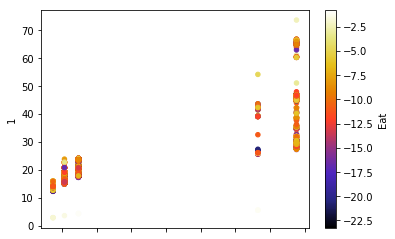

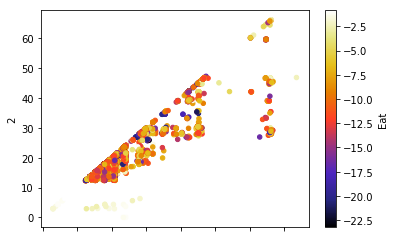

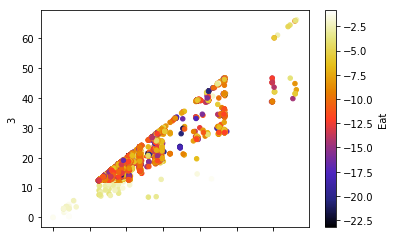

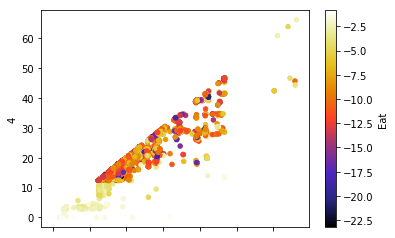

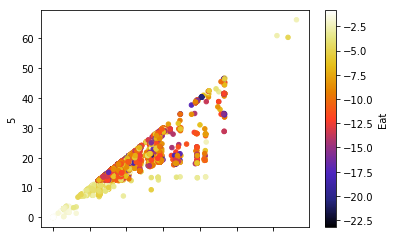

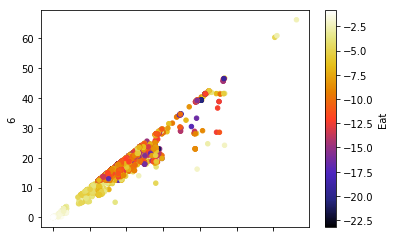

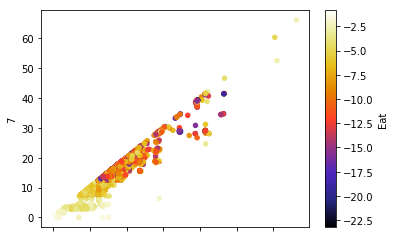

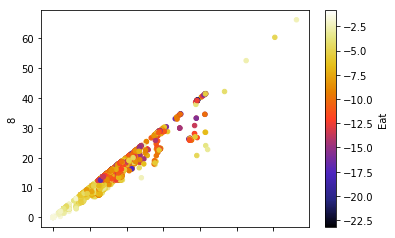

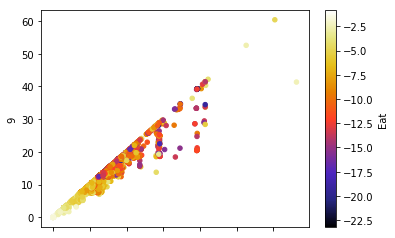

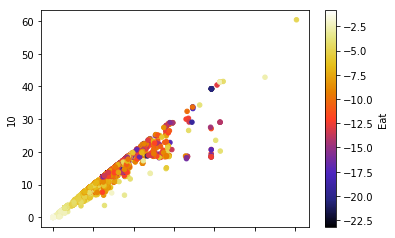

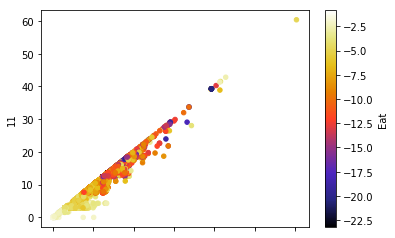

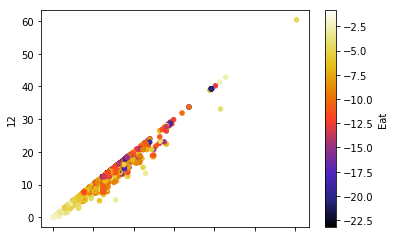

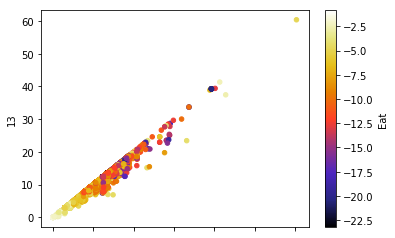

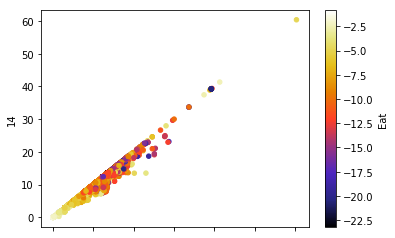

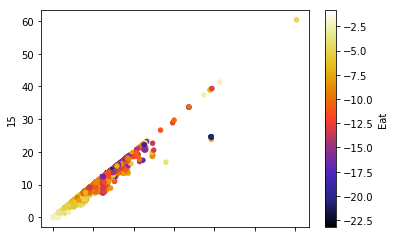

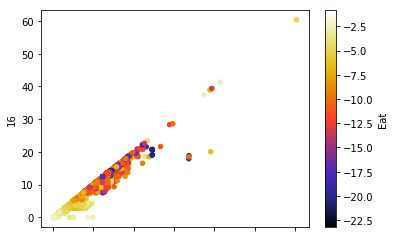

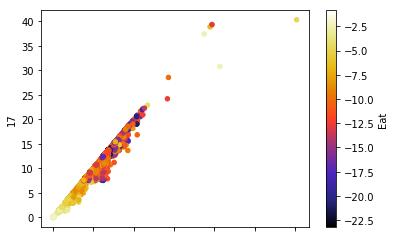

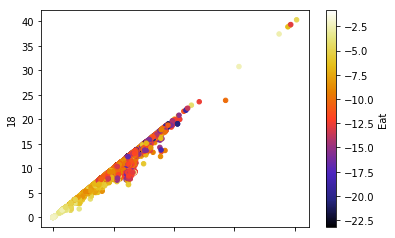

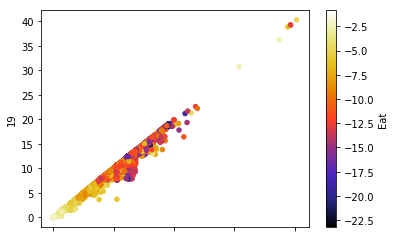

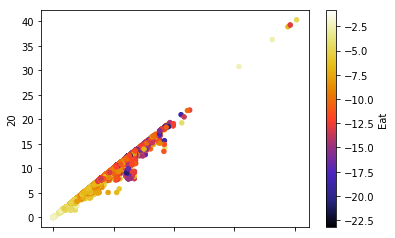

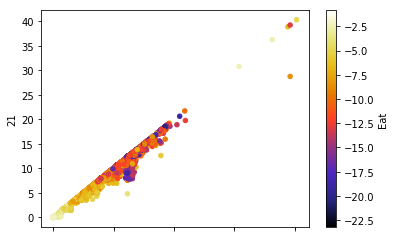

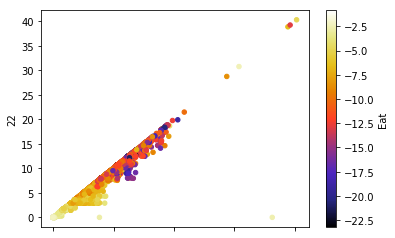

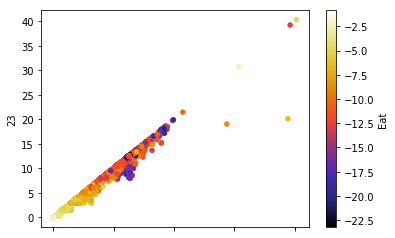

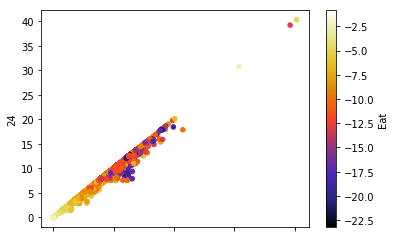

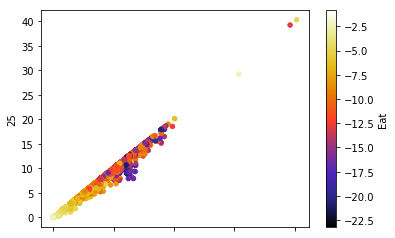

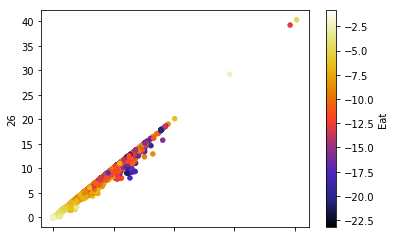

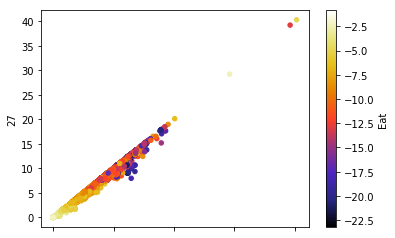

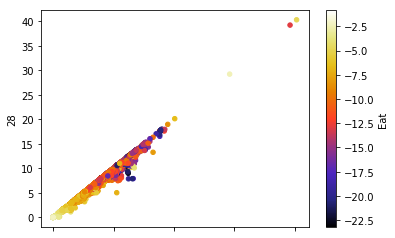

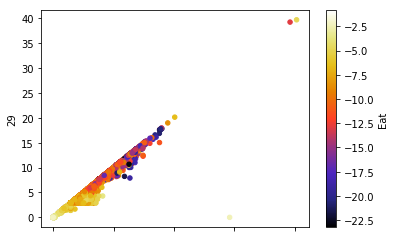

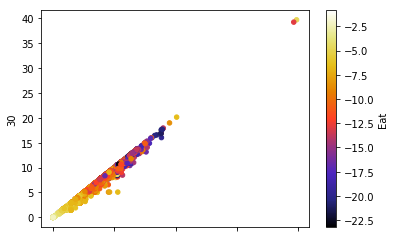

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for x in range(30):
    
    df.plot.scatter(x,x+1,c=-1, colormap=plt.get_cmap('CMRmap'))
    plt.show()
df.plot.scatter?

### Splitting our data
Like we learned in our previous chapter, it's a good idea to split our data. 

In [7]:
from sklearn.model_selection import train_test_split
print(len(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(len(X_train))
print(len(X_test))

datasetX = X_train.values
datasetY = Y_train.values
#print(datasetX.shape)
#print(datasetY.shape)
#print(datasetY)

16242
12993
3249


## Section 2: a first approach - the neural network we made in section 1

Let's start with manually constructing our network again, just like we did in section 1. 

## Simplifying layer building
In chapter 1 we made our network using the following code: 



In [8]:
import tensorflow as tf

n_input = 1275
n_output = 1
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, n_input], name="inputplaceholder")
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
outputlayer = tf.nn.sigmoid(layer_2)

## Which we can simplify to: 
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))

outputlayer = tf.nn.sigmoid(tf.add(tf.matmul(inputplaceholder, weights), biases))


Still, typing this out for a big neural network is a lot of work, and it's easy to make errors. This is why you can build functions that perform the same thing for you. 

You can also use the higher level functions already available in Tensorflow. You can make the same thing using: 

`tf.layers.dense(inputs=inputplaceholder, units=3, activation=tf.nn.sigmoid, name="single_layer_neural_network") `

Another option you might want to consider is the Keras python package. Keras is a high-level API definition for neural networks. It uses Tensorflow as backend to build its functions on. A neural network even more complex than in chapter two can be made like this: 
![keras logo](https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg)
![tensorflow logo](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Tensorflow_logo.svg/1000px-Tensorflow_logo.svg.png)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=10, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


Using TensorFlow backend.


### Why stick to Tensorflow
It's very likely that for your specific application Keras is good enough (95% sure). However, Tensorflow as been adapting the Keras API specifications, and thus Tensorflow can do roughly the same as Keras. The reason to stick to Tensorflow is that it offers a LOT of extra functionality, which will come in handy for the "strange" applications you want to build. 

Let's create a simple single-layer neural network for our new dataset!

In [10]:
import tensorflow as tf
import numpy as np

In [11]:
tf.layers.dense?

In [12]:
LEARNING_RATE = 0.05
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, units=300, activation=tf.nn.relu, name="first_dense_layer")
network_prediction = tf.layers.dense(inputs=dense, units=1, activation=None, name="prediction_dense_layer")

print(dense)
print(network_prediction)
loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

print(loss)
print("Optimizer: --------")
print(optimizer)


Tensor("first_dense_layer/Relu:0", shape=(?, 300), dtype=float32)
Tensor("prediction_dense_layer/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
Optimizer: --------
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_first_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_first_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/bias/ApplyGradientDescent"



In [13]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

This gives us this network: 
![network](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/two-layer-regression.png)

In [17]:
import random

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
for _ in range(10):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)

95.468
145869.0
223018.0
243.778
1244.53
125.932
156.123
89.4635
88.5591
135.873


### Adjusting the learning rate
As you can see above our loss becomes HIGHER instead of lower. About once a week I see somebody on Stackoverflow ask why this is happening, and why their network is giving nan as output. The answer is: they have to adjust their learning rate.

![LR](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/Learning-rates.png)

A nice analogy I like to use is one in which we are walking through misty mountains, and want to reach the deepest valley. Every 5 minutes we determine based on our small observation what path leads down, and continue that way. If we did this every second we could never leave small valleys. If we only did this every day we might walk right out of the valley again...

Let's adjust our learning rate tenfold every time till our network is able to learn something. 

In [18]:
LEARNING_RATE = 0.0005
optimizer = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
loss_history = list()
for _ in range(1000):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)
    loss_history.append(l)

475.535
1.28631e+06
788109.0
519358.0
926.536
125.104
172.082
164.944
186.286
151.451
178.806
160.983
166.93
152.274
162.818
156.066
149.651
147.811
149.768
90.9503
167.927
118.501
162.057
145.371
172.359
151.195
155.518
147.354
147.259
132.238
156.645
168.902
164.298
159.022
150.324
172.538
139.899
143.951
151.825
108.847
159.78
167.762
133.603
146.525
160.052
174.623
176.434
154.767
144.749
196.735
162.446
123.843
167.619
167.453
163.479
161.612
163.726
149.697
149.027
138.658
120.931
118.022
148.742
149.906
136.611
140.465
147.145
21.297
6.53961
10.6112
37.7871
121.96
138.313
115.969
113.573
207.393
129.221
135.308
131.467
124.474
151.735
177.131
145.338
153.955
120.625
150.164
160.819
127.185
129.222
66.334
176.187
129.623
129.281
135.513
118.07
140.924
137.486
133.919
142.928
145.371
140.475
123.888
120.947
138.63
139.742
122.442
126.841
69.6014
127.391
114.947
140.805
125.879
145.035
151.11
161.765
137.723
148.824
180.99
148.53
151.338
118.76
170.663
156.355
125.505
124.028
120.2

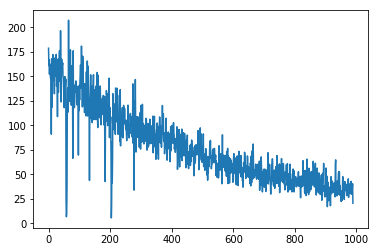

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history[10:])

### Looking at gradients
Knowing about gradients and inspecting them is a vital part of working with neural networks. If your network is stuck, broke, or does not perform as you expect it: take a look at the gradients!

Part of why this is important is that in very deep neural networks we are dealing with vanishing and exploding gradients. Imagine that you start with a high gradient in your final layer, and multiply this with the learning rate. You update your weights and move on to the next layer. Your loss is lower in this layer, and thus your gradient is lower. 


## Video 4: standardizing data



Last section we made our first multi-layer neural network. Let's first try to see how well our network performs on the test dataset we have. 

### Visualising your graph
When working with Tensorflow it's easy to make a mistake. For example, when adding an extra layer to your network it's easy to forget to connect it to other layers. A cool feature of our Jupyter notebook is that you can visualise the graph you made. The source of this code can be found in [this Stackoverflow answer](https://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter/38192374#38192374). 


In [14]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [15]:
show_graph(tf.get_default_graph().as_graph_def())


### Deep neural network
So far we only made a two-layer neural network. Let's try to create a multi-layer neural network, and see if this improves our error. 

In [ ]:
LEARNING_RATE = 0.00005
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

activation_function = tf.nn.relu
dense = tf.layers.dense(inputs=input_pl, units=300, activation=activation_function, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=150, activation=activation_function, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=50, activation=activation_function, name="third_dense_layer")
dense4 = tf.layers.dense(inputs=dense3, units=16, activation=activation_function, name="fourth_dense_layer")
outputnetwork = tf.layers.dense(inputs=dense4, units=1, activation=None, name="prediction_dense_layer")

loss = tf.losses.mean_squared_error(output_pl,outputnetwork)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
loss_history = list()
for _ in range(10000):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)
    loss_history.append(l)

In [ ]:

def reset_and_train_network(dataX, dataY, batch_size, train_x_rounds, verbose=True):
    init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
    sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
    sess.run(init)

    zipped = list(zip(dataX, dataY))


    loss_history = list()
    for _ in range(train_x_rounds):
        datax = list()
        datay = list()
        for _ in range(batch_size):
            samp = random.choice(zipped)
            datax.append(samp[0])
            datay.append([samp[1]])
        _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
        if verbose:
            print(l)
        loss_history.append(l)
    return loss_history

## Do the train set
def evaluate_network(dataX, dataY):
    datasetX = dataX.values
    datasetY = dataY.values
    datasetY = [[x] for x in datasetY]
    predicted_values, loss_dataset = sess.run([outputnetwork,loss], feed_dict={input_pl: datasetX, output_pl: datasetY})
    print(loss_dataset)
    plt.scatter(datasetY, predicted_values)
    plt.show()

evaluate_network(X_train, Y_train)
print("-"*10)
evaluate_network(X_test, Y_test)


### Why standardize data
Scikit preprocessing library: http://scikit-learn.org/stable/modules/preprocessing.html
tf.Transform library: https://github.com/tensorflow/transform

At the moment we are feedign the raw properties of atoms to the network. Especially in classification you often see that you can already kind of draw a separation between 

In [ ]:
losses = reset_and_train_network(X_train.values,Y_train.values, 32, 1000, verbose=False)
plt.plot(losses)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
res = scaler.transform(X_train)
print(X_train.head(1))
print(res[0])

losses_norm = reset_and_train_network(res,Y_train.values, 32, 1000, verbose=False)


In [ ]:
plt.plot(losses[-100:])
plt.plot(losses_norm[-100:])


### Annealing the learning rate
Right now we keep the learning rate the same the whole time. It's generally a good idea to reduce your learning rate slowly during training. There are several options for this with Tensorflow: 
- Define a placeholder for the learning rate and pass this to the network as parameter
- Use the `tf.train.exponential_decay` function. 
We are going use the second approach!


In [ ]:
tf.train.exponential_decay?

> 
When training a model, it is often recommended to lower the learning rate as
the training progresses.  This function applies an exponential decay function
to a provided initial learning rate.  It requires a `global_step` value to
compute the decayed learning rate.  You can just pass a TensorFlow variable
that you increment at each training step.

In [ ]:
LEARNING_RATE = 0.00005
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = LEARNING_RATE
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           10000, 0.96, staircase=True)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## Video 5: improving the network by understanding the activation function



## Video 6: the importance of hyper parameters, grid-search optimization -> wide vs deep? -  Conclusion


### Revisiting train, test, and the validation set
During our search for the best hyper parameters we did something terrible: by optimising our network on our test data, and taking the best parameters for our test data, we "leaked knowledge" about our test set into our algorithms. 

Right now I'm not going to fix this, but you have to be aware of this "smell" in your own train data... it probably affects your results when you take new data. 

In [ ]:
filename_queue = tf.train.string_input_producer(["datasets/celebrities/list_attr_celeba.txt"])
textlinereader = tf.TextLineReader(skip_header_lines=2) #https://www.tensorflow.org/api_docs/python/tf/TextLineReader
key, val = textlinereader.read(filename_queue)
sess = tf.Session()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

#record_defaults = [["000001.jpg"] + [0]*40]
record_defaults = [[0] for _ in range(40)]
content = tf.decode_csv(val, record_defaults=record_defaults)


# Evaluate the tensor `c`.
print(sess.run([key,val]))
print(sess.run([key,val]))
print(sess.run([key,val]))
print(sess.run([key,val]))
#print(sess.run([content]))

# https://www.tensorflow.org/programmers_guide/reading_data

In [ ]:

tf.decode_csv?
    

In [ ]:
print(zipped)


In [ ]:
col1, col2, col3, col4, col5 = tf.decode_csv(
    value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4])

with tf.Session() as sess:
  # Start populating the filename queue.
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1200):
    # Retrieve a single instance:
    example, label = sess.run([features, col5])

  coord.request_stop()
  coord.join(threads)


In [ ]:
estimator = tf.estimatorDNNRegressor(
    feature_columns=[sparse_feature_a_emb, sparse_feature_b_emb],
    hidden_units=[1024, 512, 256])


In [ ]:
tf.estimator.DNNRegressor(feature_columns=[sparse_feature_a_emb, sparse_feature_b_emb],
    hidden_units=[1024, 512, 256]))

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cool Keras thing

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=1275, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=4, batch_size=5, verbose=1)
seed=10
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, datasetX, datasetY, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(datasetX, datasetY)
prediction = estimator.predict(datasetXtest)
plt.scatter(datasetYtest,prediction)

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



Although some of the clouds overlap you can see that we are probably able to classify any new species based on these three properties of the flowers. 






If you have your own dataset with values that look similar to those of the Iris dataset, give the network you just made a go! If the network does not converge yet, there are many tips and tricks you have to know about neural networks that you need to learn, and will learn during this course. 


In [ ]:
import sklearn

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris['feature_names'])
print(len(iris['data']))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Cool snail-age tutorial: https://www.tensorflow.org/versions/r0.12/tutorials/estimators/

## A single layer network
This is where we show 

$Y = \sum{weight*input} + bias$

This means that for one neuron we multiply the input with the weight, do this for each input-weight combination, and then add a bias. 



## What activation functions are out there?

Story about how deep learning advances the last couple of years are party due to new activation functions: RELU and ELU. 

By only multiplying you get a 'linear' seperation. Why/how? 

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

That's why it's common to add a 'nonregularity' after each layer. This turns the linear activation into a nonlinear activation. 

[Available activation functions](https://www.tensorflow.org/api_guides/python/nn#Activation_Functions)
Let's take a look at the nonregularities Tensorflow offers out of the box with some sample graphs:


In [ ]:
inputdata = np.arange(-5.0, 5.0, 0.1)
SHAPE_INPUT = inputdata.shape
print(SHAPE_INPUT)

In [ ]:
mydatainput = tf.placeholder(dtype=tf.float32, shape=SHAPE_INPUT)
reluoutput = tf.nn.relu(mydatainput) # https://www.tensorflow.org/api_docs/python/tf/nn/relu

relu6output = tf.nn.relu6(mydatainput)
creluoutput = tf.nn.crelu(mydatainput) # Concatenated relu
eluoutput = tf.nn.elu(mydatainput)
sigmoidoutput = tf.sigmoid(mydatainput)
tanhoutput = tf.tanh(mydatainput)

# tf.nn.softplus
# tf.nn.softsign
# tf.nn.dropout
# tf.nn.bias_add

print(reluoutput)

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)


In [ ]:
a,b,c,d,e = sess.run([reluoutput, creluoutput, eluoutput, sigmoidoutput, tanhoutput], feed_dict={mydatainput:inputdata})
print(a)
for x in [a,b,c,d,e]:
    print(len(x))

In [ ]:
plt.plot(a)



plt.plot(c)

plt.plot(d)

plt.plot(e)
plt.legend(['relu', 'elu', 'sigmoid', 'tanh'], loc='upper left')

plt.show()

You might think: what do I have to do with all this information, how do I use it, what activation function is best? The take-home message here is that you should know what they exist, how each one of them looks in the plot above. 


## Softmax
In classificiation it's a good idea to use softmax. 

Right now each output neuron gives us a 'score'. The neuron with the highest score tells us what flower we are probably dealing with. 
But what about those difficult flowers that look like each other? We would love to have a probability per class. This is why we use the softmax layer. 

What this layer does is taking all activations and summing them: 
XXXX
Then it divides each activation through the total sum. 


